In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold


In [2]:
crop = pd.read_csv('Datasets/Crop_Recommendation.csv')
crop.shape

(2200, 8)

In [3]:
# N= Nitrogen, P= Phosphorous, K= Potassium
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Dropping duplicate rows

In [6]:
crop.duplicated().sum()

0

In [7]:
#There are no duplicated rows so this isn't needed
#crop.drop_duplicates()

In [8]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

### Checking number of unique classes

In [9]:
crop['label'].nunique()

22

In [10]:
labels = crop['label'].unique()
labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
crop.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


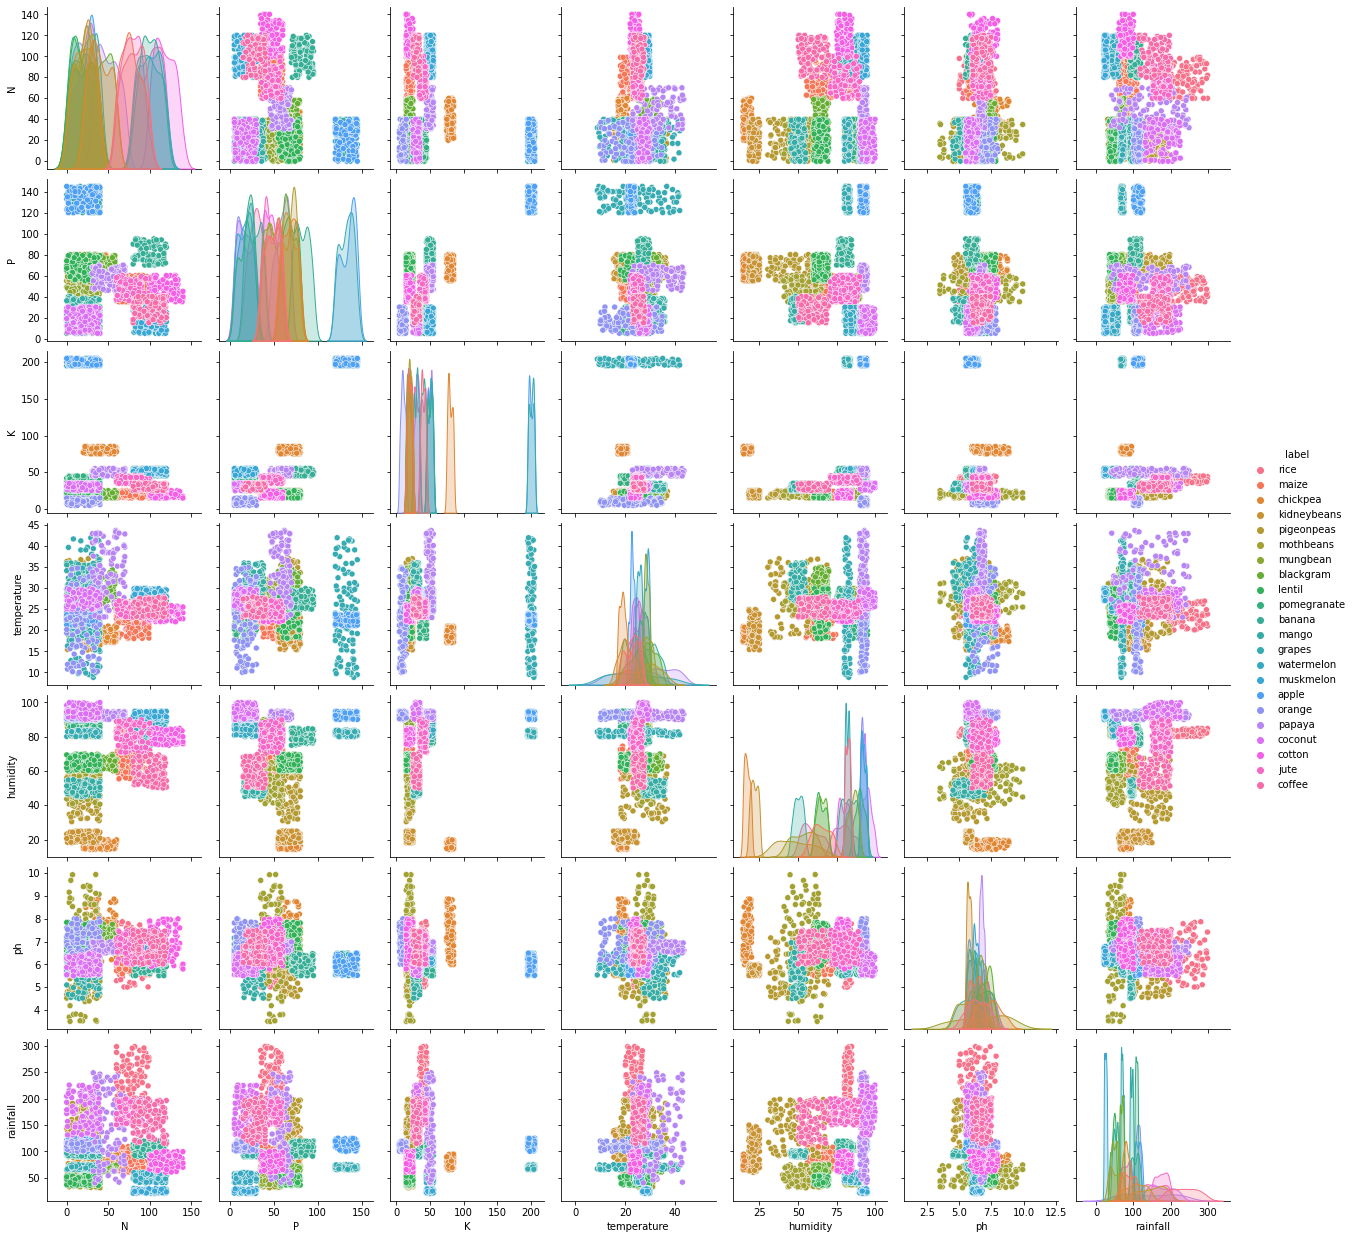

In [12]:
sns.pairplot(crop,hue= 'label')

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
data = crop.iloc[:,:-1].to_numpy()
label = crop.iloc[:,-1].to_numpy()


In [33]:
kf = KFold(n_splits=2,shuffle=False)
kf.get_n_splits(data)


2

In [29]:
x_train,x_test,y_train,y_test = train_test_split(data, 
                            label,
                            test_size=0.2,
                            shuffle=True,
                            stratify= label,
                            random_state=42)



In [17]:
# dataset

In [18]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [34]:
for train_index,test_index in kf.split(data,label):
    x_train,x_test = data[train_index],data[test_index]
    y_train,y_test = label[train_index],label[test_index]
    print("Train: ",train_index,"Test: ",test_index)

Train:  [1100 1101 1102 ... 2197 2198 2199] Test:  [   0    1    2 ... 1097 1098 1099]
Train:  [   0    1    2 ... 1097 1098 1099] Test:  [1100 1101 1102 ... 2197 2198 2199]


In [20]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
1095,108.0,94.0,47.0,27.359116,84.546250,6.387431,90.812505
1096,92.0,81.0,52.0,28.010680,76.528081,5.891414,103.704078
1097,110.0,71.0,54.0,28.672089,82.207936,5.725419,94.379875
1098,82.0,75.0,55.0,27.345851,78.487383,6.281070,92.155243


In [21]:
pd.DataFrame(y_train)

,0
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
1095,banana
1096,banana
1097,banana
1098,banana


In [22]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6
0,2.0,40.0,27.0,29.737700,47.548852,5.954627,90.095869
1,39.0,24.0,31.0,33.556956,53.729798,4.757115,98.675276
2,21.0,26.0,27.0,27.003155,47.675254,5.699587,95.851183
3,25.0,22.0,25.0,33.561502,45.535566,5.977414,95.705259
4,0.0,21.0,32.0,35.898556,54.259642,6.430139,92.197217
...,...,...,...,...,...,...,...
1095,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
1096,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
1097,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
1098,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [23]:
pd.DataFrame(y_test)

,0
0,mango
1,mango
2,mango
3,mango
4,mango
...,...
1095,coffee
1096,coffee
1097,coffee
1098,coffee


### Training perceptron on given data

In [35]:
#tol = stopping criterion.
# If its not none, iteration will stop when (loss<previous_loss - tol)
#default value 1e-3

#Random_state = used to shuffle training data.
perceptron = Perceptron(tol = 1e-3,random_state=42)
perceptron.fit(x_train,y_train)
perceptron.score(x_train,y_train)



0.8672727272727273

### Getting accuracy value of test data

In [36]:
perceptron.score(x_test,y_test)

0.0

<p>
<li>decision_function(X)

Predict confidence scores for samples.

<li>densify()

Convert coefficient matrix to dense array format.

<li>fit(X, y[, coef_init, intercept_init, ...])

Fit linear model with Stochastic Gradient Descent.

<li>get_params([deep])

Get parameters for this estimator.

<li>partial_fit(X, y[, classes, sample_weight])

Perform one epoch of stochastic gradient descent on given samples.

<li>predict(X)

Predict class labels for samples in X.

<li>score(X, y[, sample_weight])

Return the mean accuracy on the given test data and labels.

<li>set_params(**params)

Set the parameters of this estimator.

<li>sparsify()

Convert coefficient matrix to sparse format.
</p>

In [26]:
pd.DataFrame(perceptron.predict(x_test[7,:].reshape(1,-1)))

,0
0,mothbeans


In [27]:
x_test[7,:].reshape(1,-1)


array([[18.        , 17.        , 31.        , 31.74592134, 45.16127859,
         5.66750771, 93.75441586]])

In [28]:
x_test[7,:]

array([18.        , 17.        , 31.        , 31.74592134, 45.16127859,
        5.66750771, 93.75441586])